# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Nguyễn Mậu Gia Bảo
- MSSV: 21127583
- Lớp: 21CLC08

# Import

In [3]:
import pandas as pd
import numpy as np

# Import thêm dữ thư viện nếu cần
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import seaborn as sns 
import matplotlib.pyplot as plt

# Đọc dữ liệu

In [4]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa các đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu kiểm tra)

X_test = test.iloc[:, :-1]      # Dataframe (chứa các đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần


# Cài đặt hàm

In [5]:
# Cài đặt các hàm cần thiết ở đây


# Yêu cầu 1a: Sử dụng toàn bộ 11 đặc trưng đầu tiên `Gender`, `10percentage`, `12percentage`, `CollegeTier`, `Degree`, `collegeGPA`, `CollegeCityTier`, `English`, `Logical`, `Quant`, `Domain` (2 điểm) 

In [6]:
# Phần code cho yêu cầu 1a
X_train1 = train.iloc[:, :11]
X_test1 = test.iloc[:, :11]
reg = LinearRegression()

reg.fit(X_train1,y_train)
y_test_pre = reg.predict(X_test1)

print(pd.DataFrame({'Actual': y_test,'Predicted': y_test_pre}))
print('𝜃_0 = ',reg.intercept_)
print(pd.DataFrame({'Feature': X_train1.columns, 'Coefficient': reg.coef_}))


     Actual      Predicted
0    280000  194207.931605
1    520000  340719.587174
2    150000  325416.848614
3    180000  273672.747998
4    300000  298369.367264
..      ...            ...
745  330000  283138.705779
746  450000  381114.179673
747  180000  297490.122949
748   90000  242061.854334
749  360000  328403.653091

[750 rows x 2 columns]
𝜃_0 =  49248.0897348093
            Feature   Coefficient
0            Gender -23183.329508
1      10percentage    702.766792
2      12percentage   1259.018788
3       CollegeTier -99570.608141
4            Degree  18369.962450
5        collegeGPA   1297.532000
6   CollegeCityTier  -8836.727123
7           English    141.759939
8           Logical    145.742347
9             Quant    114.643313
10           Domain  34955.750405


In [7]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
print("MAE:",np.mean(np.abs(y_test - y_test_pre)))

MAE: 105052.52978823161


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 49248.090 + -23183.330.Gender + 702.767.\,10percentage + 1259.019.\,12percentage + - 99570.608.CollegeTier +  18369.962.Degree + 1297.532.collegeGPA +  - 8836.727.CollegeCityTier +  141.760.English + 145.742.Logical + 114.643.Quant + 34955.750.Domain$$

# Yêu cầu 1b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng tính cách với các đặc trưng tính cách gồm `conscientiousness`, `agreeableness`, `extraversion`, `nueroticism`, `openess_to_experience`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [8]:
# Phần code cho yêu cầu 1b
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu

train2 = train.sample(frac=1)
y_train2 = train2.iloc[:, -1]

feature = []
for i in range(18,23):
    feature.append(train2.iloc[:, i].values.reshape(-1, 1))

name = train2.columns[18:23]
result =[]
for i in range(5):
    result.append(cross_val_score(reg, feature[i],y_train2, scoring="neg_mean_absolute_error", cv=5))
    
MAE = []
cross = []
for i in range(5):
    MAE.append(np.mean(np.abs(result[i])))
    cross.append([i+1,name[i], MAE[i]])
    
print(pd.DataFrame(cross, columns=['STT','Mô hình với 1 đặc trưng',' MAE']))

best1b = np.argmin(MAE)
print("Đặc trưng tốt nhất: ", name[best1b])

   STT Mô hình với 1 đặc trưng            MAE
0    1       conscientiousness  124065.291310
1    2           agreeableness  123519.095517
2    3            extraversion  123766.856355
3    4             nueroticism  123382.918395
4    5   openess_to_experience  123800.495756
Đặc trưng tốt nhất:  nueroticism


In [9]:
# Huấn luyện lại mô hình best_personality_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện

X_best_trainb = X_train[['nueroticism']]
X_best_testb = X_test[['nueroticism']]

reg1b = LinearRegression()
reg1b.fit(X_best_trainb, y_train)

y_test_pre1b = reg1b.predict(X_best_testb)

print(pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pre1b}))
print('𝜃_0 = ',reg1b.intercept_)
print(pd.DataFrame({'Feature': X_best_trainb.columns, 'Coefficient': reg1b.coef_}))

     Actual      Predicted
0    280000  316828.694183
1    520000  296119.311476
2    150000  297530.805068
3    180000  294185.517191
4    300000  290122.466398
..      ...            ...
745  330000  328713.438182
746  450000  303649.413497
747  180000  326681.912785
748   90000  322476.270699
749  360000  299884.362487

[750 rows x 2 columns]
𝜃_0 =  304647.55255226186
       Feature   Coefficient
0  nueroticism -16021.493662


In [10]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_personality_feature_model
print("MAE:",np.mean(np.abs(y_test - y_test_pre1b)))

MAE: 119361.91739987816


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 304647.553 + -16021.494.nueroticism$$

# Yêu cầu 1c: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng `English`, `Logical`, `Quant`, tìm mô hình cho kết quả tốt nhất (1 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [11]:
# Phần code cho yêu cầu 1c
# Tìm ra đặc trưng tốt nhất
# In ra các kết quả cross-validation như yêu cầu
train3 = train.sample(frac=1)
y_train3 = train3.iloc[:, -1]

feature3 = []
for i in range(7,10):
    feature3.append(train3.iloc[:, i].values.reshape(-1, 1))

name3 = train3.columns[7:10]
result3 =[]
for i in range(3):
    result3.append(cross_val_score(reg, feature3[i], y_train3, scoring="neg_mean_absolute_error", cv=5))
    
MAE3 = []
cross3 = []
for i in range(3):
    MAE3.append(np.mean(np.abs(result3[i])))
    cross3.append([i+1,name3[i], MAE3[i]])
    
print(pd.DataFrame(cross3, columns=['STT','Mô hình với 1 đặc trưng',' MAE']))

best1c = np.argmin(MAE3)
print("Đặc trưng tốt nhất: ", name3[best1c])

   STT Mô hình với 1 đặc trưng            MAE
0    1                 English  120813.211269
1    2                 Logical  119856.743347
2    3                   Quant  117206.118700
Đặc trưng tốt nhất:  Quant


In [12]:
# Huấn luyện lại mô hình best_skill_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
X_best_trainc = X_train[['Quant']]
X_best_testc = X_test[['Quant']]

reg1c = LinearRegression()
reg1c.fit(X_best_trainc, y_train)

y_test_pre1c = reg1c.predict(X_best_testc)

print(pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pre1c}))
print('𝜃_0 = ',reg1c.intercept_)
print(pd.DataFrame({'Feature': X_best_trainc.columns, 'Coefficient': reg1c.coef_}))

     Actual      Predicted
0    280000  197063.009037
1    520000  359358.093125
2    150000  337226.945295
3    180000  270833.501804
4    300000  302185.961230
..      ...            ...
745  330000  302185.961230
746  450000  326161.371379
747  180000  245013.829336
748   90000  322472.846741
749  360000  311407.272826

[750 rows x 2 columns]
𝜃_0 =  117759.72931230697
  Feature  Coefficient
0   Quant   368.852464


In [13]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_skill_feature_model
print("MAE:",np.mean(np.abs(y_test - y_test_pre1c)))

MAE: 108814.05968837194


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = 117759.729 + 368.852.Quant$$

# Yêu cầu 1d: Sinh viên tự xây dựng mô hình, tìm mô hình cho kết quả tốt nhất (3 điểm)

Lưu ý: khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

## Tìm mô hình

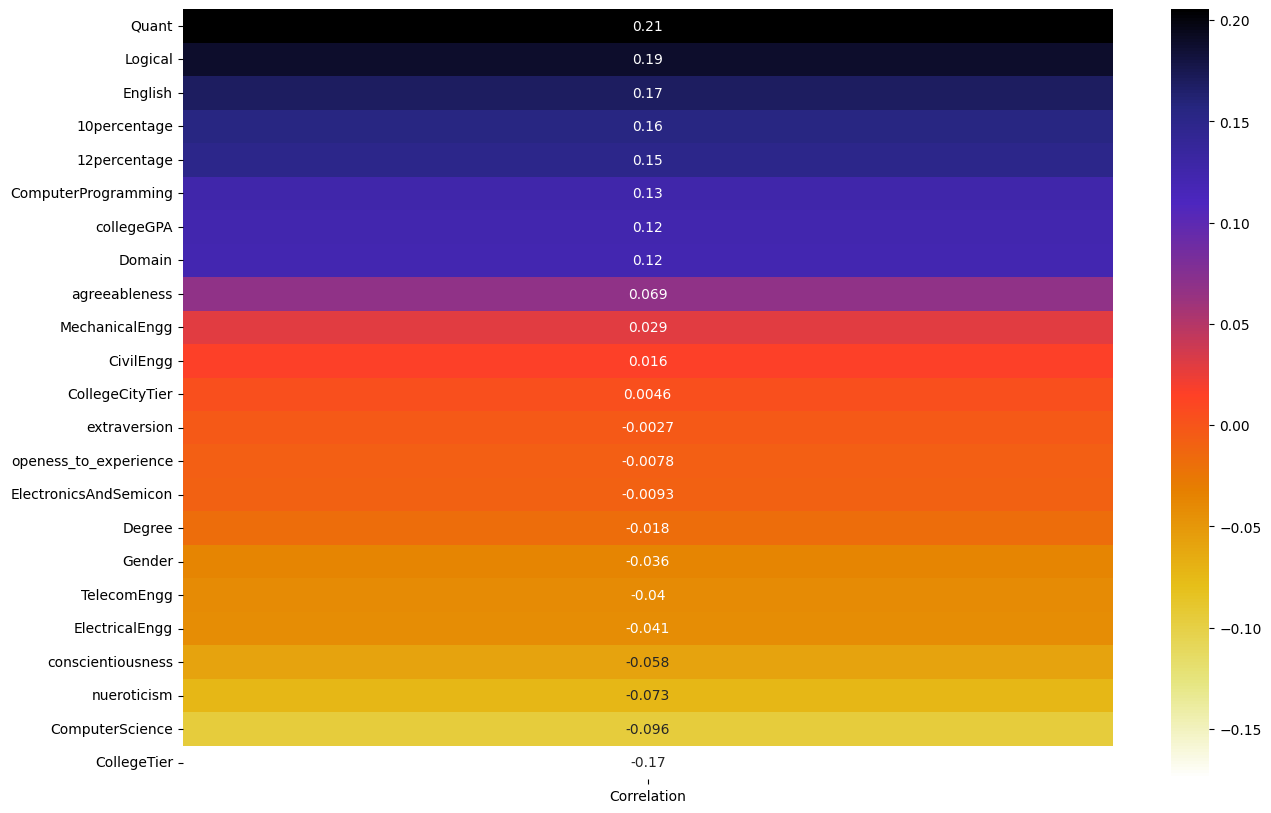

In [14]:
# Trình bày các phần tìm ra mô hình
train4 = train.sample(frac=1)
y_train4 = train4.iloc[:, -1]

correlations = X_train.corrwith(y_train)
correlation_df = pd.DataFrame({'Correlation': correlations })
correlation_df = correlation_df.sort_values(by='Correlation',ascending =False)
plt.figure(figsize=(15,10))
sns.heatmap(correlation_df,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

X_train_1d_1 = train4.iloc[:, [1, 2, 5, 7, 8, 9, 10, 11]]
X_train_1d_2 = train4.iloc[:, [1, 2, 5, 7, 8, 9, 10, 11]].apply(lambda x: np.power(x, 3))
X_train_1d_3 = train4.iloc[:, [1, 2, 5, 7, 8, 9, 10, 11]].apply(lambda x: np.power(x, 4))

## Thử nghiệm, so sánh các mô hình

In [15]:
# Phần code cho yêu cầu 1d
# Tìm ra mô hình tốt nhất (tự thiết kế bởi sinh viên)
# In ra các kết quả cross-validation như yêu cầu

data = []
data.append(X_train_1d_1.values)
data.append(X_train_1d_2.values)
data.append(X_train_1d_3.values)

result4 = []
for i in range(3):
    result4.append(cross_val_score(reg, data[i], y_train4, scoring="neg_mean_absolute_error", cv=5))

MAE4 = []
cross4 = []
name4 = ['8 đặc trưng tương quan nhất', 'Mũ 3 8 đặc trưng tương quan nhất', 'Mũ 4 8 đặc trưng tương quan nhất']

for i in range(3):
    MAE4.append(np.mean(np.abs(result4[i])))
    cross4.append([i+1, name4[i], MAE4[i]])

print(pd.DataFrame(cross4, columns=['STT', 'Mô hình ', 'MAE']))

best1d = np.argmin(MAE4)
print("Mô hình tốt nhất: ", name4[best1d])
name1d = name4[best1d]


   STT                          Mô hình             MAE
0    1       8 đặc trưng tương quan nhất  113229.428984
1    2  Mũ 3 8 đặc trưng tương quan nhất  113366.387526
2    3  Mũ 4 8 đặc trưng tương quan nhất  113998.076621
Mô hình tốt nhất:  8 đặc trưng tương quan nhất


In [16]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện

X_best_traind = train.iloc[:, [1, 2, 5, 7, 8, 9, 10, 11]]
X_best_testd = test.iloc[:, [1, 2, 5, 7, 8, 9, 10, 11]]

X_best_traind = X_best_traind.values
X_best_testd = X_best_testd.values

column_indices = [1, 2, 5, 7, 8, 9, 10, 11]
name4 =train.columns[column_indices].tolist()
reg1d = LinearRegression()
reg1d.fit(X_best_traind, y_train)

y_test_pre1d = reg1d.predict(X_best_testd)

print(pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pre1d}))
print('𝜃_0 = ',reg1d.intercept_)
print(pd.DataFrame({'Feature':name4 , 'Coefficient': reg1d.coef_}))

     Actual      Predicted
0    280000  198818.501223
1    520000  356768.476072
2    150000  331513.150234
3    180000  275480.586399
4    300000  315432.329499
..      ...            ...
745  330000  291191.455969
746  450000  352476.731087
747  180000  293305.292244
748   90000  267782.644509
749  360000  347985.079861

[750 rows x 2 columns]
𝜃_0 =  -176677.6167721477
               Feature   Coefficient
0         10percentage    671.584127
1         12percentage    985.311764
2           collegeGPA   1193.068081
3              English    155.090380
4              Logical    144.618183
5                Quant    167.789339
6               Domain  24416.460730
7  ComputerProgramming     70.416148


In [17]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
print("MAE:",np.mean(np.abs(y_test - y_test_pre1d)))

MAE: 104446.3670545784


Công thức hồi quy (phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012)

$$\text{Salary} = -176677.617 + 671.584.10percentage + 985.312.12percentage + 1193.068.collegeGPA + 155.090.English + 144.618.Logical + 167.789.Quant + 24416.461.Domain + 70.416.ComputerProgramming$$